# 관심있는 주제 :  신용카드 고객 이탈 예측 (금융)
## 이유 : 신용카드 고객 이탈 예측은 금융권에서 매우 중요한 문제로 고객 유지와 매출 증대에 직결된다고 하는데 이 분야를 직접 분석하며 데이터 분석과 머신러닝의 기초를 배우고자 선택했습니다.
## 관련데이터 : 참고

In [18]:
import pandas as pd
import seaborn as sns
tt =sns.load_dataset('titanic')


In [5]:
# 데이터 타입 확인
type(tt) # 데이터 프레임
type(tt['pclass']) # 시리즈
tt['pclass']


0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [6]:

sum(tt['pclass']) # 총합
min(tt['pclass']) #  최솟값
max(tt['pclass']) # 최댓값
import numpy as np
np.mean(tt['pclass']) # 산술평균


np.float64(2.308641975308642)

In [7]:

tt.head(8)
tt.tail(8)

tt.shape # 전체 행, 열 추출  
tt.info() # 데이터 요약
tt.columns #  컬럼만 출력
tt.dtypes # 데이터 타입 확인
tt.describe(include='all') # 통계 요약정보 확인



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

t_num = tt.select_dtypes(include='number') # 수치형 데이터만 추출 
np.mean(tt['pclass']) # 산술평균
np.median(tt['pclass']) # 중앙값

tt['pclass'].mode() # 최빈값
 
np.std(tt['pclass']) # 표준편차
np.var(tt['pclass']) # 분산
tt['pclass'].quantile([0.25, 0.5, 0.75]) # 1,2,3 분위수
tt[['pclass', 'survived']].corr().iloc[0,1]  # 상관계수
tt[['pclass', 'survived']].cov().iloc[0,1] # 공분산


np.float64(-0.1377028714107364)

In [9]:

from scipy import stats
stats.skew(tt['pclass']) # 왜도
stats.kurtosis(tt['pclass']) # 첨도
stats.sem(tt['pclass']) # 표준오차


np.float64(0.028009440447754382)

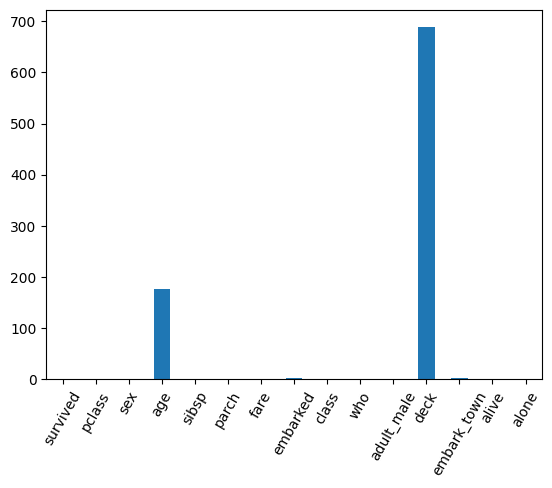

In [10]:

import matplotlib.pyplot as plt
null_count =tt.isnull().sum() # 결측치 값 합쳐서 확인하기
null_count
null_count.plot.bar(rot=60) # 결측치 시각화
plt.show()

In [11]:

# 결측치 확인
tt_null_count = null_count.reset_index() 
tt_null_count.columns = ["컬럼명", "결측치수"]
tt_null_count_top = tt_null_count.sort_values(by="결측치수", ascending=False).head(5) # ascending=False 결측치수 많은 수로 정
tt_null_count_top


,컬럼명,결측치수
11,deck,688
3,age,177
7,embarked,2
12,embark_town,2
2,sex,0


In [12]:

# 'deck' 결측치 너무 많아서 삭제
tt.drop(columns=['deck'], inplace=True)

# 'age' 결측치를 중앙값으로 대체
tt['age'].fillna(tt['age'].median(), inplace=True)

# 'embarked'와 'embark_town' 결측치를 최빈값으로 대체
tt['embarked'].fillna(tt['embarked'].mode()[0], inplace=True)
tt['embark_town'].fillna(tt['embark_town'].mode()[0], inplace=True)

null_count =tt.isnull().sum() # 결측치 값 합쳐서 확인하기


C:\Users\yusse\AppData\Local\Temp\ipykernel_29264\1177226900.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt['age'].fillna(tt['age'].median(), inplace=True)
C:\Users\yusse\AppData\Local\Temp\ipykernel_29264\1177226900.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [13]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # 객체 생성
tt['Sex_encoded'] = le.fit_transform(tt['sex']) 
# 레이블 인코딩 여자 : 0, 남자 : 1
tt['Sex_encoded']


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_encoded, Length: 891, dtype: int64

In [14]:

# 필요없는 데이터 삭제
tt.drop(columns=['sex'], inplace=True)
tt




,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Sex_encoded
0,0,3,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,1
887,1,1,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0
889,1,1,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,1


In [15]:


# 범주형 데이터 열 출력
non_numeric_cols = tt.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)



Index(['embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [16]:

# 불리언 컬럼 0/1로 변환
for col in ['adult_male', 'alone']:
    tt[col] = tt[col].astype(int)


In [17]:

#  alive 레이블 인코딩 no -> 0, yes -> 1
le = LabelEncoder()
tt['alive_encoded'] = le.fit_transform(tt['alive'])
tt.drop(columns=['alive'], inplace=True)

#  embarked, class, who, embark_town 원-핫 인코딩 -> 데이터 간 순서가 있는 경우
tt = pd.get_dummies(tt, columns=['embarked', 'class', 'who', 'embark_town'], drop_first=True)
tt

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,Sex_encoded,alive_encoded,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,1,0,1,0,False,True,False,True,True,False,False,True
1,1,1,38.0,1,0,71.2833,0,0,0,1,False,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,0,1,0,1,False,True,False,True,False,True,False,True
3,1,1,35.0,1,0,53.1000,0,0,0,1,False,True,False,False,False,True,False,True
4,0,3,35.0,0,0,8.0500,1,1,1,0,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,1,0,False,True,True,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,0,1,0,1,False,True,False,False,False,True,False,True
888,0,3,28.0,1,2,23.4500,0,0,0,0,False,True,False,True,False,True,False,True
889,1,1,26.0,0,0,30.0000,1,1,1,1,False,False,False,False,True,False,False,False
